<h1>Analyzing Best Factors For Students</h1>

This project focuses on using Python and Pandas to explore and analyze factors that have effects on students. Some questions will arise when looking at our data set. The goal is answering them and finding the best factors for students.

<h4>Note: To see columns that do not appear in some larger outputs, click on the output and use the arrow keys.</h4>

<h1>Setup</h1>

In [4]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Done")

Done


<h1>Load Dataset</h1>

In [6]:
data=pd.read_csv('StudentPerformanceFactors.csv')

Let's take a look at our dataset.

In [8]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<h1>Data Cleaning and Preparation</h1>

In [10]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

__It looks like we have null values. Let's take care of them.__

In [12]:
data=data.dropna()

In [13]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

__No more null values.__

__Column Descriptions__

Hours_Studied  ->  Number of hours spent studying per week.

Attendance  ->  Percentage of classes attended.

Parental_Involvement  ->  Level of parental involvement in the student's education (Low, Medium, High).

Access_to_Resources  ->  Availability of educational resources (Low, Medium, High).

Extracurricular_Activities  ->  Participation in extracurricular activities (Yes, No).

Sleep_Hours  ->  Average number of hours of sleep per night.

Previous_Scores  ->  Scores from previous exams.

Motivation_Level  ->  Student's level of motivation (Low, Medium, High).

Internet_Access  ->  Availability of internet access (Yes, No).

Tutoring_Sessions  ->  Number of tutoring sessions attended per month.

Family_Income  ->  Family income level (Low, Medium, High).

Teacher_Quality  ->  Quality of the teachers (Low, Medium, High).

School_Type  ->  Type of school attended (Public, Private).

Peer_Influence  ->  Influence of peers on academic performance (Positive, Neutral, Negative).

Physical_Activity  ->  Average number of hours of physical activity per week.

Learning_Disabilities  ->  Presence of learning disabilities (Yes, No).

Parental_Education_Level  ->  Highest education level of parents (High School, College, Postgraduate).

Distance_from_Home  ->  Distance from home to school (Near, Moderate, Far).

Gender  ->  Gender of the student (Male, Female).

Exam_Score  ->  Final exam score.

__Let's organize the data so that only student-focused and more important columns remain. We will remove the students with leraning disabilities also.__

In [17]:
boolean_mask=data.Learning_Disabilities == "Yes"

We can find the number of students with learning disabilities.

In [19]:
data[boolean_mask].shape[0]

668

It would not be fair to look at their notes and include them in the analysis. Remove them...

In [21]:
indexes_to_drop=data[boolean_mask].index

In [22]:
data=data.drop(indexes_to_drop)

In [23]:
data[boolean_mask].shape[0]

/var/folders/79/bp2rdcs508z45g6d60qt4xr80000gn/T/ipykernel_20766/1958728015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[boolean_mask].shape[0]


0

Ok, now let's go back to other columns.

In [25]:
columns_to_drop=['Parental_Involvement','Extracurricular_Activities','Physical_Activity','Learning_Disabilities','Parental_Education_Level']

In [26]:
data=data.drop(labels=columns_to_drop,axis=1)

In [27]:
data.head()

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Distance_from_Home,Gender,Exam_Score
0,23,84,High,7,73,Low,Yes,0,Low,Medium,Public,Positive,Near,Male,67
1,19,64,Medium,8,59,Low,Yes,2,Medium,Medium,Public,Negative,Moderate,Female,61
2,24,98,Medium,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,Near,Male,74
3,29,89,Medium,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,Moderate,Male,71
4,19,92,Medium,6,65,Medium,Yes,3,Medium,High,Public,Neutral,Near,Female,70


We can start now.

<h1>Explore Data</h1>

First we need to see the entire dataset

In [31]:
data

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Distance_from_Home,Gender,Exam_Score
0,23,84,High,7,73,Low,Yes,0,Low,Medium,Public,Positive,Near,Male,67
1,19,64,Medium,8,59,Low,Yes,2,Medium,Medium,Public,Negative,Moderate,Female,61
2,24,98,Medium,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,Near,Male,74
3,29,89,Medium,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,Moderate,Male,71
4,19,92,Medium,6,65,Medium,Yes,3,Medium,High,Public,Neutral,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,Medium,7,76,Medium,Yes,1,High,Medium,Public,Positive,Near,Female,68
6603,23,76,Medium,8,81,Medium,Yes,3,Low,High,Public,Positive,Near,Female,69
6604,20,90,Low,6,65,Low,Yes,3,Low,Medium,Public,Negative,Near,Female,68
6605,10,86,High,6,91,High,Yes,2,Low,Medium,Private,Positive,Far,Female,68


When we look at all the data, the first thing that comes to mind is to look at the factors of the student with the highest score. Let's sort students by their exam scores.

In [33]:
data.sort_values(by='Exam_Score',ascending=False)

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Distance_from_Home,Gender,Exam_Score
1525,27,98,Medium,6,93,Low,No,5,High,High,Public,Positive,Moderate,Female,101
94,18,89,Medium,4,73,Medium,Yes,3,High,Medium,Private,Positive,Near,Female,100
3579,14,90,High,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,Near,Female,99
2425,23,83,High,4,89,Low,Yes,1,Medium,Medium,Public,Negative,Far,Male,99
6393,16,83,Medium,8,92,Low,Yes,2,High,High,Public,Positive,Near,Female,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,14,67,Low,7,66,Low,Yes,0,Low,Medium,Public,Neutral,Far,Female,57
5907,3,60,Low,6,78,Low,Yes,1,Low,Medium,Public,Positive,Near,Female,57
5719,9,64,Low,10,68,Low,Yes,0,Medium,Medium,Private,Negative,Near,Male,57
5507,5,65,High,7,71,Medium,Yes,0,Low,Medium,Private,Negative,Far,Male,56


In [34]:
data.loc[1525]

Hours_Studied                27
Attendance                   98
Access_to_Resources      Medium
Sleep_Hours                   6
Previous_Scores              93
Motivation_Level            Low
Internet_Access              No
Tutoring_Sessions             5
Family_Income              High
Teacher_Quality            High
School_Type              Public
Peer_Influence         Positive
Distance_from_Home     Moderate
Gender                   Female
Exam_Score                  101
Name: 1525, dtype: object

So this is the factor information.

_I have some questions in my mind_

__1-)Is there anyone who takes private lessons for more than 5 lessons?__

In [38]:
data.loc[data.Tutoring_Sessions.idxmax()]

Hours_Studied                25
Attendance                   72
Access_to_Resources         Low
Sleep_Hours                   6
Previous_Scores              78
Motivation_Level            Low
Internet_Access             Yes
Tutoring_Sessions             8
Family_Income            Medium
Teacher_Quality            High
School_Type              Public
Peer_Influence         Positive
Distance_from_Home         Near
Gender                     Male
Exam_Score                   69
Name: 2231, dtype: object

__Yes there is. So private lessons is not the only key for high scores.__

__2-)What is the highest previous score?__

In [41]:
data.loc[data.Previous_Scores.idxmax()]

Hours_Studied                11
Attendance                   78
Access_to_Resources      Medium
Sleep_Hours                   8
Previous_Scores             100
Motivation_Level           High
Internet_Access             Yes
Tutoring_Sessions             1
Family_Income               Low
Teacher_Quality          Medium
School_Type              Public
Peer_Influence          Neutral
Distance_from_Home     Moderate
Gender                     Male
Exam_Score                   66
Name: 23, dtype: object

__His previous score is even more than the student with best exam score. And this time it's male.__

This won't work, we need to see the big picture. Let's move on to charts.

<h1>Data Visualization</h1>

<Axes: title={'center': 'The Relationship Between Private Lesson Hours and Exam Grades'}, xlabel='Private Lesson Hours', ylabel='Mark'>

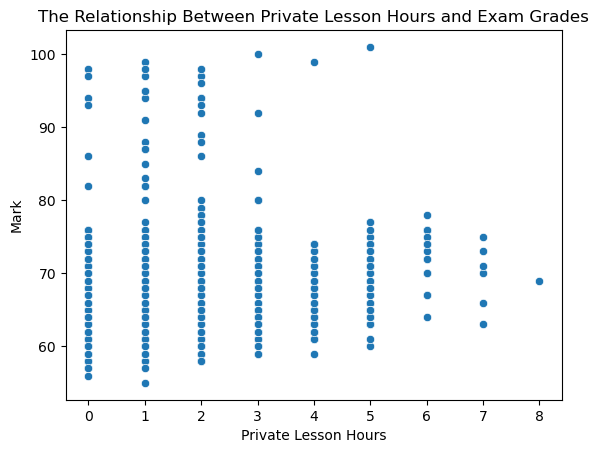

In [45]:
plt.title("The Relationship Between Private Lesson Hours and Exam Grades")
plt.xlabel("Private Lesson Hours")
plt.ylabel("Mark")
sns.scatterplot(x=data['Tutoring_Sessions'],y=data['Exam_Score'])

<Axes: title={'center': 'The Relationship Between Study Hours and Exam Grades'}, xlabel='Study Hours', ylabel='Mark'>

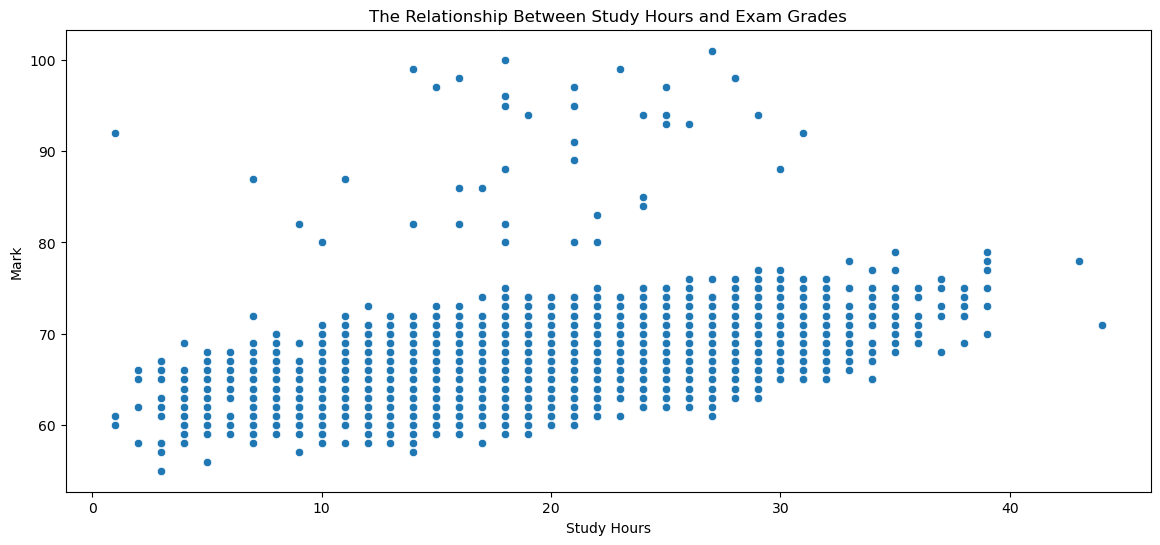

In [46]:
plt.figure(figsize=(14,6))
plt.title("The Relationship Between Study Hours and Exam Grades")
plt.xlabel("Study Hours")
plt.ylabel("Mark")
sns.scatterplot(x=data['Hours_Studied'],y=data['Exam_Score'])

<Axes: title={'center': 'The Relationship Attendance and Exam Grades'}, xlabel='Attendance', ylabel='Mark'>

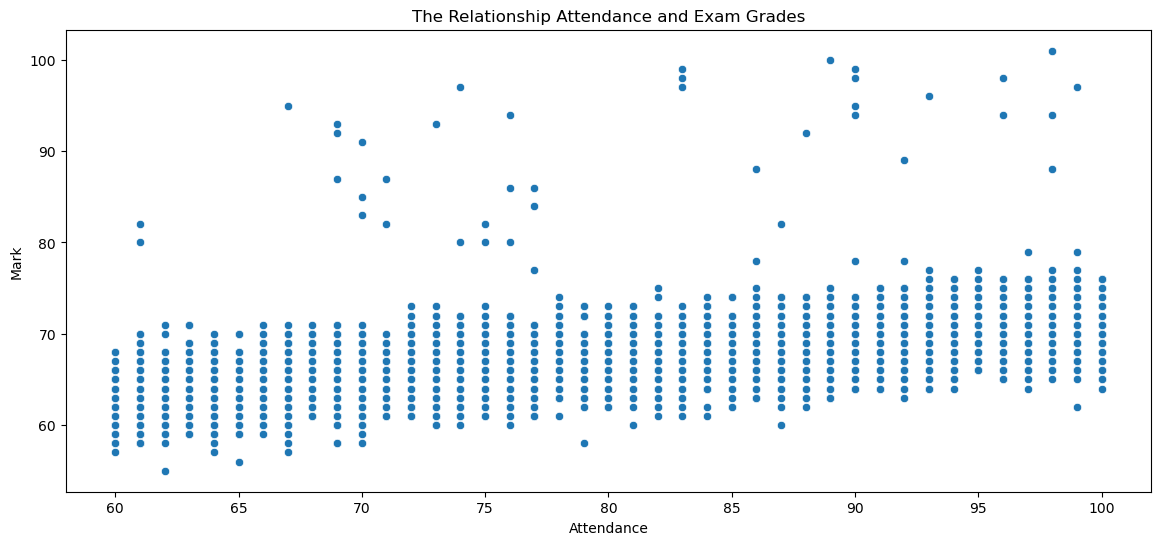

In [47]:
plt.figure(figsize=(14,6))
plt.title("The Relationship Attendance and Exam Grades")
plt.xlabel("Attendance")
plt.ylabel("Mark")
sns.scatterplot(x=data['Attendance'],y=data['Exam_Score'])

<Axes: xlabel='Gender', ylabel='Count'>

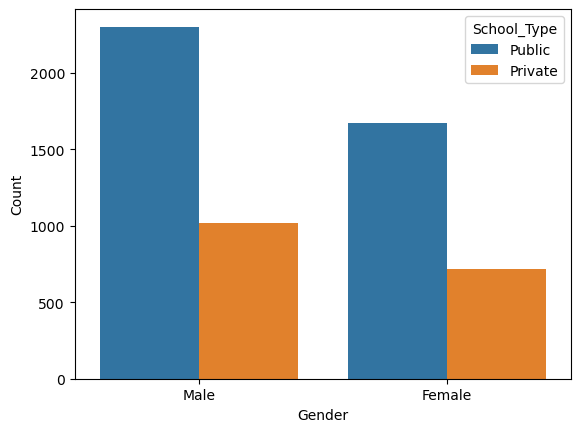

In [48]:
plt.xlabel('Gender')
plt.ylabel('Count')
sns.countplot(x='Gender',hue='School_Type',data=data)

<Axes: xlabel='Access to Resources', ylabel='Count'>

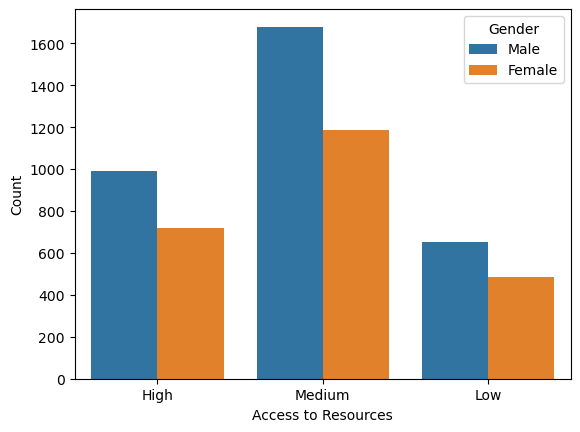

In [49]:
plt.xlabel('Access to Resources')
plt.ylabel('Count')
sns.countplot(x='Access_to_Resources',hue='Gender',data=data)

<Axes: xlabel='Motivation', ylabel='Count'>

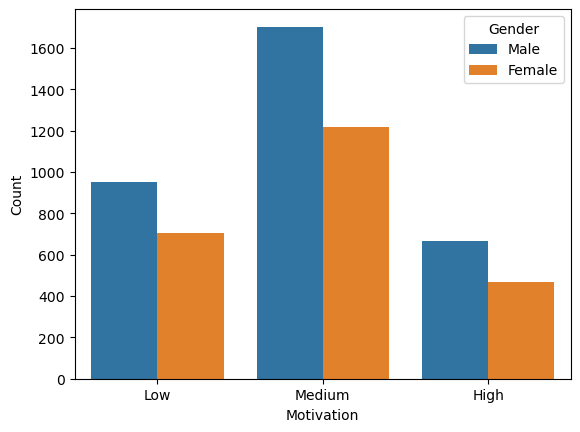

In [50]:
plt.xlabel('Motivation')
plt.ylabel('Count')
sns.countplot(x='Motivation_Level',hue='Gender',data=data)

<Axes: xlabel='Internet Access', ylabel='Count'>

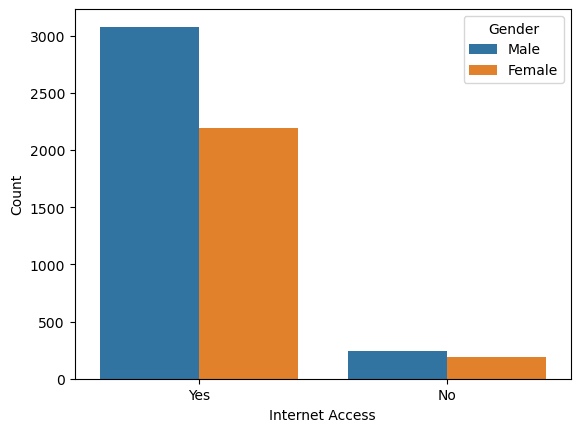

In [51]:
plt.xlabel('Internet Access')
plt.ylabel('Count')
sns.countplot(x='Internet_Access',hue='Gender',data=data)

<Axes: xlabel='Family Income', ylabel='Count'>

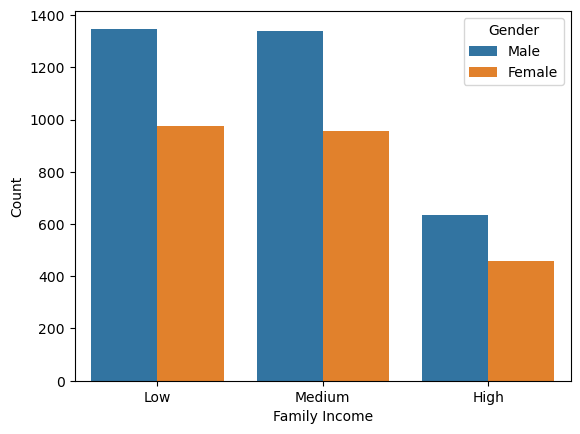

In [52]:
plt.xlabel('Family Income')
plt.ylabel('Count')
sns.countplot(x='Family_Income',hue='Gender',data=data)

<Axes: xlabel='Teacher Quality', ylabel='Count'>

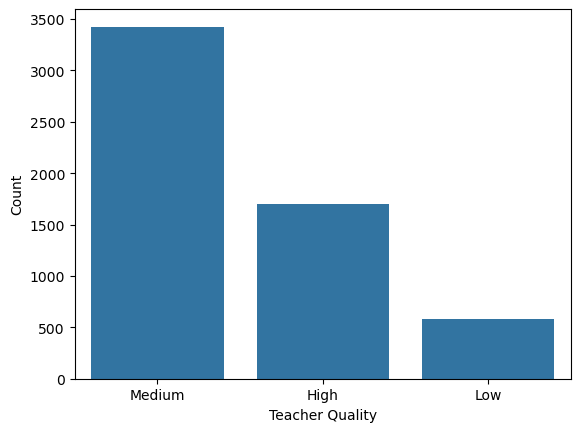

In [53]:
plt.xlabel('Teacher Quality')
plt.ylabel('Count')
sns.countplot(x='Teacher_Quality',data=data)

<Axes: xlabel='Distance', ylabel='Count'>

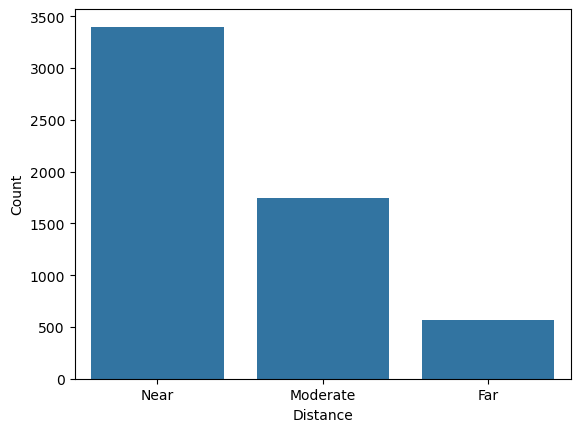

In [54]:
plt.xlabel('Distance')
plt.ylabel('Count')
sns.countplot(x='Distance_from_Home',data=data)

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

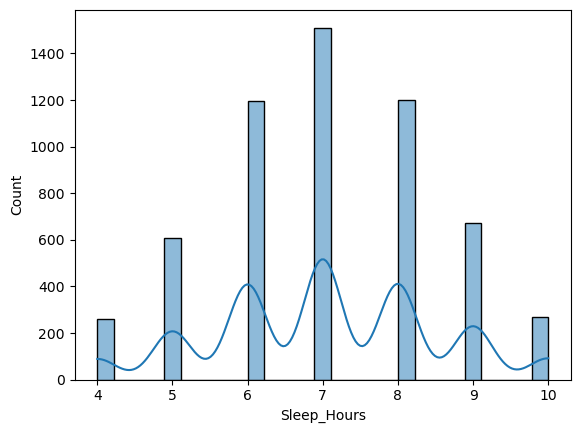

In [55]:
sns.histplot(data['Sleep_Hours'],kde=True)

<Axes: xlabel='Previous_Scores', ylabel='Count'>

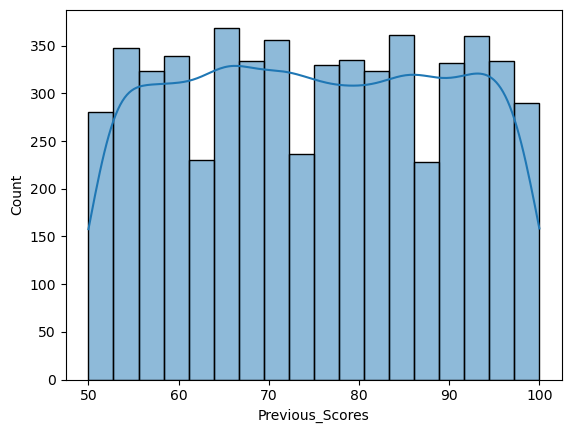

In [56]:
sns.histplot(data['Previous_Scores'],kde=True)

<Axes: xlabel='Exam_Score', ylabel='Count'>

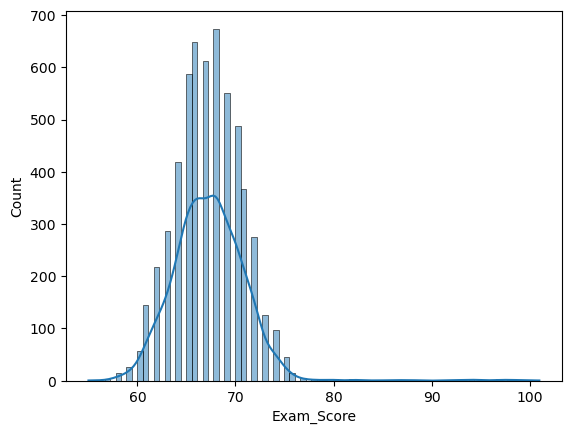

In [57]:
sns.histplot(data['Exam_Score'],kde=True)

<h1>Conclusions</h1>

_As a result of the above analysis, we have seen that although there are many factors that affect the success of students, it also depends on the student._

__Thanks for reading!__